In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
url = '/content/drive/MyDrive/GDP/stock_market_data_2023.csv'
dataset = pd.read_csv(url)

dataset_train = dataset.iloc[:-100]
dataset_test = dataset.iloc[-100:]

training_set = dataset_train.iloc[:, 1:2].values
real_stock_price = dataset_test.iloc[:, 1:2].values
dataset_test.head()

,Unnamed: 0,Open,High,Low,Close,Volume,Dividends,Stock Splits
24015,2023-08-09,4501.569824,4502.439941,4461.330078,4467.709961,3803100000,0.0,0.0
24016,2023-08-10,4487.160156,4527.370117,4457.919922,4468.830078,4504370000,0.0,0.0
24017,2023-08-11,4450.689941,4476.229980,4443.979980,4464.049805,3753290000,0.0,0.0
24018,2023-08-14,4458.129883,4490.330078,4453.439941,4489.720215,3896410000,0.0,0.0
24019,2023-08-15,4478.870117,4478.870117,4432.189941,4437.859863,3832250000,0.0,0.0


In [ ]:
print(dataset_train.shape)

(24015, 8)


## **Data Normalisation**

Normalization is changing the values of numeric columns in the dataset to a common scale, which helps the performance of our model. To scale the training dataset we use Scikit-Learn’s MinMaxScaler with numbers between zero and one.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

## **Incorporating Timesteps Into Data**

In [ ]:
X_train = []
y_train = []
for i in range(15610, 24015):
  X_train.append(training_set_scaled[i-60:i])
  y_train.append(training_set_scaled[i, 0])
  X_train, y_train = np.array(X_train), np.array(y_train)
  X_train = list(np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)))
  y_train = list(y_train)
X_train, y_train = np.array(X_train), np.array(y_train)

## **LSTM Model**


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [ ]:

model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
263/263 [==============================] - 36s 107ms/step - loss: 0.0040
Epoch 2/100
263/263 [==============================] - 29s 109ms/step - loss: 0.0013
Epoch 3/100
263/263 [==============================] - 29s 110ms/step - loss: 0.0012
Epoch 4/100
263/263 [==============================] - 29s 110ms/step - loss: 0.0010
Epoch 5/100
263/263 [==============================] - 30s 113ms/step - loss: 9.8182e-04
Epoch 6/100
263/263 [==============================] - 29s 109ms/step - loss: 8.9168e-04
Epoch 7/100
263/263 [==============================] - 28s 108ms/step - loss: 8.4263e-04
Epoch 8/100
263/263 [==============================] - 28s 108ms/step - loss: 7.6693e-04
Epoch 9/100
263/263 [==============================] - 29s 109ms/step - loss: 7.9025e-04
Epoch 10/100
263/263 [==============================] - 28s 108ms/step - loss: 6.8094e-04
Epoch 11/100
263/263 [==============================] - 28s 107ms/step - loss: 6.9955e-04
Epoch 12/100
263/263 [=============

In [ ]:
print(dataset_test)

NameError: name 'dataset_test' is not defined

In [ ]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
print(len(dataset_total))

inputs = dataset_total [len(dataset_total) - len(dataset_test):].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []

print(len(inputs))

X_test.append(inputs[:, 0])
X_test = np.array(X_test)
X_test = list(np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1)))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price)


24115
100
4/4 [==============================] - 0s 4ms/step
[[3054.4895]
 [3047.7725]
 [3030.6567]
 [3034.1619]
 [3043.8965]
 [3022.6704]
 [3014.3782]
 [2980.0989]
 [2997.1582]
 [3013.9072]
 [3004.8982]
 [3032.7637]
 [3001.5205]
 [3018.9915]
 [3022.1775]
 [3053.9172]
 [3061.6575]
 [3067.942 ]
 [3058.4348]
 [3049.2617]
 [3023.03  ]
 [3030.9443]
 [3044.8835]
 [3041.2732]
 [3036.2878]
 [3048.062 ]
 [3052.8184]
 [3028.033 ]
 [3028.1653]
 [3031.6567]
 [2994.3154]
 [2978.579 ]
 [2963.4558]
 [2964.5576]
 [2949.765 ]
 [2943.3875]
 [2972.0022]
 [2950.6917]
 [2943.4368]
 [2925.7   ]
 [2938.2952]
 [2926.1753]
 [2952.8975]
 [2977.615 ]
 [2990.578 ]
 [2997.4749]
 [2987.6392]
 [2978.8838]
 [2980.2683]
 [2986.1243]
 [2968.6873]
 [2945.4526]
 [2914.061 ]
 [2926.671 ]
 [2925.0007]
 [2896.8728]
 [2885.2922]
 [2878.4705]
 [2894.5366]
 [2909.5112]
 [2942.7036]
 [2974.9392]
 [2989.4604]
 [2990.395 ]
 [2999.12  ]
 [3002.4927]
 [2989.4026]
 [3009.778 ]
 [3034.5571]
 [3056.2239]
 [3052.3997]
 [3058.1982]
 [3

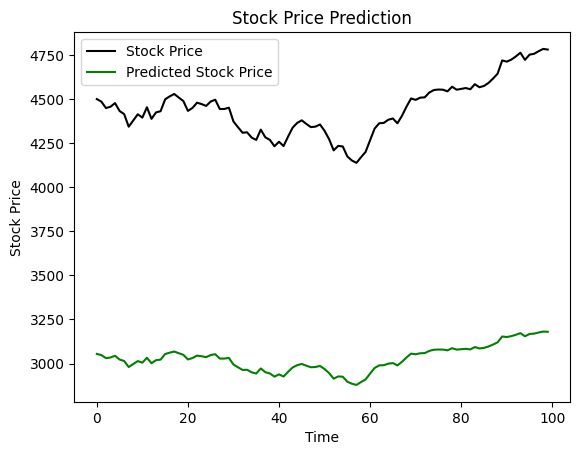

In [ ]:
plt.plot(real_stock_price, color = 'black', label = 'Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()